
<p>^(.*\s_{99}\s*\n\n(((\w|\.|\(|\))*\s))*\n\s{11,}(\w))</p>


<p>\s*\n -> \n</p>
<p>\n_+ -> </p>
<p>(\s{2,}) -> ,</p>


In [1]:
import numpy as np

In [2]:
sis2 = open('random-data/sism2.out').readlines()
print(len(sis2))

290


In [3]:
print(sis2)

['\n', '                                      ARENA Simulation Results\n', '                                      deinfo - License: STUDENT\n', '\n', '                                  Sumário para Replicação 1 de 3\n', '\n', 'Projeto: Exemplo FABRICA_ROUPA para Analise de Resultados            Data da execução : 4/ 5/2018\n', 'Analista: Darci Prado                                                 Data de revisão do modelo: 4/ 5/2018\n', '\n', 'Replicação terminada no tempo de      : 2400.0 Minutos \n', 'Unidade de Tempo Base: Minutos\n', '\n', '                                           VARIÁVEIS DE REGISTRO\n', '\n', 'Identificador                                  Média   Meia Largura  Mínimo    Máximo   Observações\n', '___________________________________________________________________________________________________\n', '\n', 'Processo Corte.TotalTimePerEntity           20.405     (Insuf)    8.3381     56.307        177    \n', 'Processo Corte.VATimePerEntity              9.9968   

In [118]:
def smooth_curve(x, y):
    
    xx = np.array(x)
    sx = np.argsort(xx)
    xx = xx[sx]
    yy = np.array(y)
    yy = yy[sx]
    
    x_new = np.linspace(xx.min(), xx.max(), 30)
    y_new = spline(xx, yy,x_new)
    
    return x_new, y_new

In [5]:
def get_lines(file, lines_range):
    lines = ''
    for line, block in enumerate(file):
        if line in lines_range and line != 2:
            lines += block
    return lines

In [6]:
get_lines(sis2, [i for i in range(10)])

'\n                                      ARENA Simulation Results\n\n                                  Sumário para Replicação 1 de 3\n\nProjeto: Exemplo FABRICA_ROUPA para Analise de Resultados            Data da execução : 4/ 5/2018\nAnalista: Darci Prado                                                 Data de revisão do modelo: 4/ 5/2018\n\nReplicação terminada no tempo de      : 2400.0 Minutos \n'

In [7]:
def generate_lines(file):
    lines = np.array([[[i, i+21], [i+25, i+40], [i+44, i+67]] for i in range(14, len(file), 84)]).ravel().reshape(-1, 2)
    lines = lines[:-2]
    lines[-1] = [lines[-1][0]+1, lines[-1, 1]]
    
    return lines

In [8]:
blocks = generate_lines(sis2)

In [9]:
print(blocks)

[[ 14  35]
 [ 39  54]
 [ 58  81]
 [ 98 119]
 [123 138]
 [142 165]
 [182 203]
 [207 222]
 [226 249]
 [267 287]]


In [106]:
import re
import pandas as pd
from io import StringIO
from scipy.interpolate import spline

In [11]:
dataframes = []
for block in blocks:
    table = get_lines(sis2, [i for i in range(block[0], block[1])])
    table = re.sub(r'^(.\s_{99}\s\n\n(((\w|.|(|))\s))\n\s{11,}(\w))', '', table)
    table = re.sub(r'\s*\n', '\n', table)
    table = re.sub(r'\n_+', '', table)
    table = re.sub(r'(\s{2,})', ',', table)
    
    dataframes.append(pd.read_csv(StringIO(table), sep=',', encoding='utf8'))


In [12]:
dataframes[0]

,Identificador,Média,Meia Largura,Mínimo,Máximo,Observações
0,Processo Corte.TotalTimePerEntity,20.4050,(Insuf),8.3381,56.307,177
1,Processo Corte.VATimePerEntity,9.9968,(Insuf),8.1064,11.854,177
2,Processo Inspecao.TotalTimePerEntity,3.0000,(Insuf),3.0000,3.000,103
3,Processo Costura.VATimePerEntity,23.0220,(Insuf),18.3510,27.716,103
4,Processo Costura.TotalTimePerEntity,563.1900,(Insuf),26.1420,1083.600,103
5,Processo Corte.WaitTimePerEntity,10.4080,(Insuf),0.0000,46.799,177
6,Processo Inspecao.VATimePerEntity,3.0000,(Insuf),3.0000,3.000,103
7,TEMPO NO SISTEMA,644.2500,(Insuf),44.8370,1529.900,84
8,Processo Inspecao.WaitTimePerEntity,0.0000,(Insuf),0.0000,0.000,103
9,Processo Costura.WaitTimePerEntity,540.1600,(Insuf),0.0000,1063.400,103


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

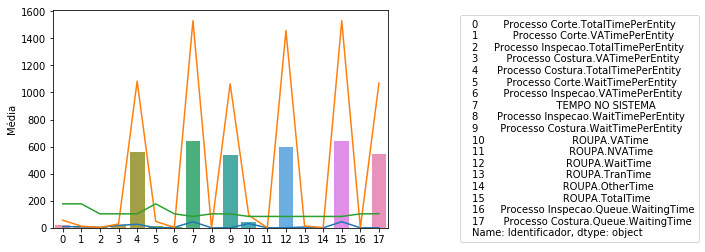

In [120]:
sns.barplot(dataframes[0].index, dataframes[0]['Média'])
plt.plot(dataframes[0].index, dataframes[0]['Mínimo'])
plt.plot(dataframes[0].index, dataframes[0]['Máximo'])
plt.plot(dataframes[0].index, dataframes[0]['Observações'])
plt.legend([dataframes[0].index, dataframes[0]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

In [124]:
dataframes[1]

,Identificador,Média,Meia Largura,Mínimo,Máximo,Valor Final
0,ROUPA.WIP,48.38800,(Insuf),0.0,95.0,93.0
1,CORTADEIRA.NumberBusy,0.73727,(Insuf),0.0,1.0,0.0
2,CORTADEIRA.NumberScheduled,1.00000,(Insuf),1.0,1.0,1.0
3,CORTADEIRA.Utilization,0.73727,(Insuf),0.0,1.0,0.0
4,INSPETOR.NumberBusy,0.12875,(Insuf),0.0,1.0,0.0
5,INSPETOR.NumberScheduled,1.00000,(Insuf),1.0,1.0,1.0
6,INSPETOR.Utilization,0.12875,(Insuf),0.0,1.0,0.0
7,COSTUREIRA.NumberBusy,0.99513,(Insuf),0.0,1.0,1.0
8,COSTUREIRA.NumberScheduled,1.00000,(Insuf),1.0,1.0,1.0
9,COSTUREIRA.Utilization,0.99513,(Insuf),0.0,1.0,1.0


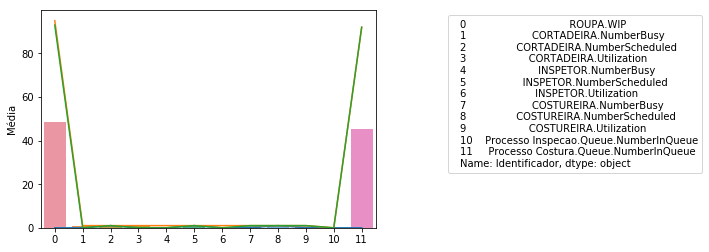

In [125]:
sns.barplot(dataframes[1].index, dataframes[1]['Média'])
plt.plot(dataframes[1].index, dataframes[1]['Mínimo'])
plt.plot(dataframes[1].index, dataframes[1]['Máximo'])
plt.plot(dataframes[1].index, dataframes[1]['Valor Final'])
plt.legend([dataframes[1].index, dataframes[1]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

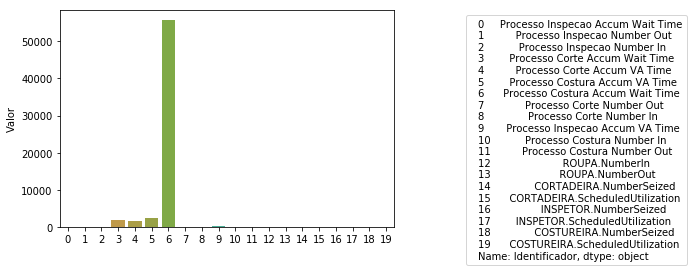

In [88]:
sns.barplot(dataframes[2].index, dataframes[2]['Valor'])
plt.legend([dataframes[2].index, dataframes[2]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

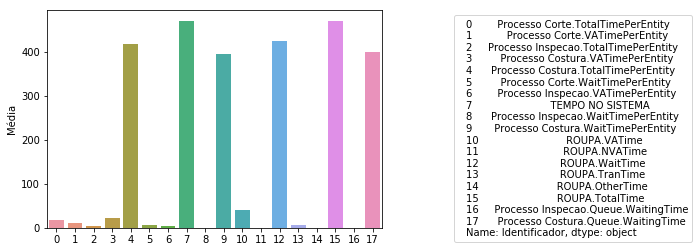

In [92]:
sns.barplot(dataframes[3].index, dataframes[3]['Média'])
plt.legend([dataframes[3].index, dataframes[3]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

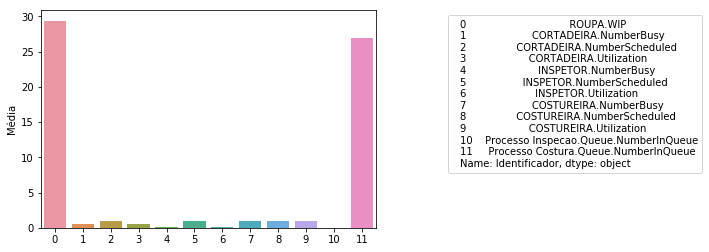

In [94]:
sns.barplot(dataframes[4].index, dataframes[4]['Média'])
plt.legend([dataframes[4].index, dataframes[4]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

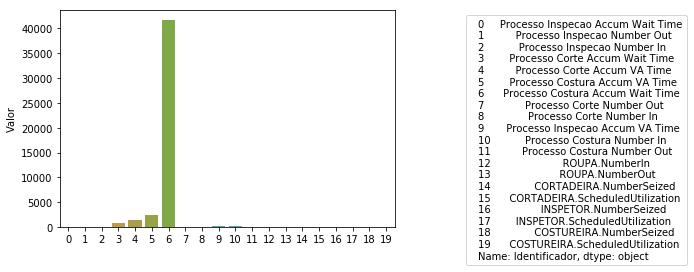

In [96]:
sns.barplot(dataframes[5].index, dataframes[5]['Valor'])
plt.legend([dataframes[5].index, dataframes[5]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

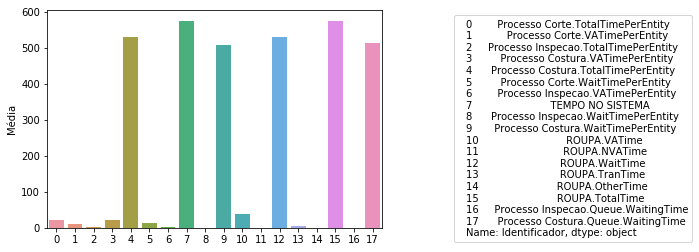

In [98]:
sns.barplot(dataframes[6].index, dataframes[6]['Média'])
plt.legend([dataframes[6].index, dataframes[6]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

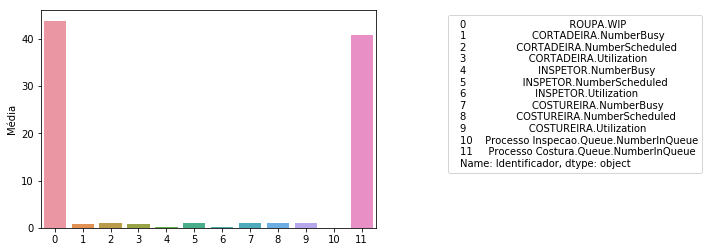

In [100]:
sns.barplot(dataframes[7].index, dataframes[7]['Média'])
plt.legend([dataframes[7].index, dataframes[7]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

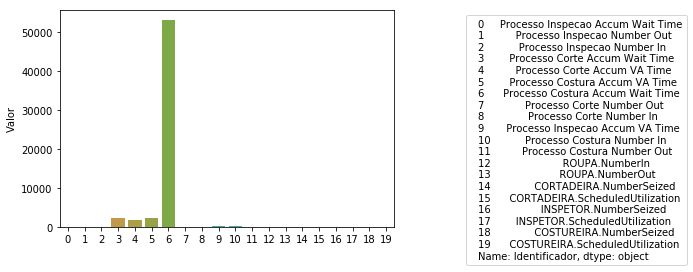

In [102]:
sns.barplot(dataframes[8].index, dataframes[8]['Valor'])
plt.legend([dataframes[8].index, dataframes[8]['Identificador']][1:10], bbox_to_anchor=(1.2, 1), handlelength=0)

In [103]:
dataframes[9]

,Processo Inspecao Number Out,104.00,2.4843,103.00,105.00,3
0,Processo Inspecao Number In,104.00000,2.48430,103.00000,105.00000,3
1,Processo Corte Accum Wait Time,1669.60000,1664.00000,930.39000,2236.20000,3
2,Processo Corte Accum VA Time,1628.80000,515.22000,1390.60000,1769.40000,3
3,Processo Costura Accum VA Time,2372.40000,2.54600,2371.30000,2373.10000,3
4,Processo Costura Accum Wait Time,50050.00000,18522.00000,41584.00000,55637.00000,3
5,Processo Corte Number Out,163.33000,52.48500,139.00000,177.00000,3
6,Processo Corte Number In,163.33000,52.48500,139.00000,177.00000,3
7,Processo Inspecao Accum VA Time,312.00000,7.45300,309.00000,315.00000,3
8,Processo Costura Number In,183.66000,42.76600,164.00000,196.00000,3
9,Processo Costura Number Out,104.00000,2.48430,103.00000,105.00000,3
